## Calculate wet bulb temperature
Empirical formula for wet bulb temperature used in [Dunne et al (2013)](https://www.nature.com/articles/nclimate1827?proof=trueMay%252F), taken from [Davies-Jones (2008)](https://journals.ametsoc.org/mwr/article/136/7/2764/68177/An-Efficient-and-Accurate-Method-for-Computing-the), accurate between 0 and 100$^\circ C$.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
from dask.diagnostics import ProgressBar
from esm2m import thermodynamics as td

In [21]:
# Point to model data
rootdir = '/local/ss23/GFDL_LEs/ATM/RCP85/'
suffix = '.rcp85.ens103.1950_2100.nc'
variables = ['sphum_k24','ps','t_ref_max']
ds = xr.Dataset()
for var in variables:
    print(var)
    ds[var] = xr.open_dataarray(rootdir+var+suffix,chunks={'time':1000}).squeeze()

sphum_k24
ps
t_ref_max


In [22]:
wbt = td.calc_wbt_from_tref_sh_p(ds['t_ref_max'], ds['sphum_k24'], ds['ps']/100, method='Stull')
wbt.name = 'WBT'
wbt.attrs = {'units':'degC',
             'long_name':'Wet bulb temperature at 2m, from daily max absolute temperature, specific humidity and pressure, calculated using Stull (2011) J. Appl. Meteor. Climatol.'}

In [23]:
with ProgressBar():
    wbt.to_netcdf(rootdir+'wbt_max_stull'+suffix)

[########################################] | 100% Completed |  1min 29.4s


In [259]:
# Load CESM2 data for comparison
rootdir = '/local/ss23/CESM2_LE/ATM/RCP85/WBT/'
filename = 'b.e21.BHISTcmip6.f09_g17.LE2-1231.001.clm2.h7.WBT.1980010100-1990010100.nc'
ds_cesm = xr.open_dataset(rootdir+filename)

In [260]:
ds_cesm = ds_cesm.sel(time=slice('1980-01-01','1981-01-01'))

/home/aos/graemem/miniconda3/envs/esm2m/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


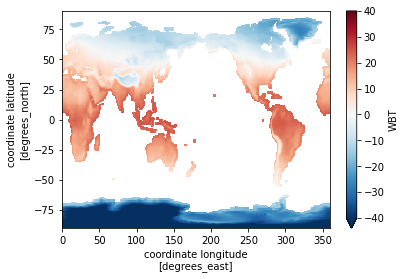

In [261]:
ds_cesm['WBT'].mean('time').plot(vmin=-40,vmax=40,cmap='RdBu_r')

In [169]:
ds['sphum_k24']

<xarray.DataArray 'sphum_k24' (time: 366, lat: 90, lon: 144)>
dask.array<getitem, shape=(366, 90, 144), dtype=float32, chunksize=(316, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
    pfull    float64 996.1
  * time     (time) object 1980-01-01 12:00:00 ... 1981-01-01 12:00:00
Attributes:
    long_name:      specific humidity
    units:          kg/kg
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [266]:
_calc_wbt_from_tref_rh_p(303.15,50,1000)

22.24878622290593